In [15]:
import torch
import torch.nn as nn
import os
import cv2
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from torchvision import models
from torchvision import transforms
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [16]:
if(os.path.split(os.getcwd())[1] == "classify-to-learn"):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))

cuda = False

Current Working Directory: progettoVIPM


In [17]:
from utils.loadersAndEnums import datasets
from utils.loadersAndEnums import networks
from utils.loadersAndEnums import ImageDataset
from utils.v2 import ExtendedEncoder, Encoder

In [18]:
from utils.loadersAndEnums import datasets, ImageDataset
from torch.utils.data import DataLoader, ConcatDataset, random_split

trainU = ImageDataset(dataset=datasets.TRAINING_UNLABELED,network_input_size=224, cuda=cuda)
unlabeled = DataLoader(trainU,64,True)


In [20]:

device = torch.device('cpu')
#PATH = "Storage\models\AutoEncoderModelV2.pth"
PATH = 'Storage\models\\FineTuned_ResNet50_80_Train.pth'
model = models.resnet50()
model.fc = nn.Linear(model.fc.in_features, 251)
if cuda:
    model.load_state_dict(torch.load(PATH))
else:
    model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu') ) )
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
all_preds = []
all_out = []
model.eval()
with torch.no_grad():
    for inputs,labels in tqdm(unlabeled):
        labels = [int(label) for label in labels]
        inputs, labels = inputs.to(device), torch.tensor(labels, dtype=torch.long).to(device)
        outputs = model(inputs)
        print('outputs: ', outputs)
        print('outputs: ', outputs.shape)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_out.extend(outputs.cpu().numpy())
        
all_preds = np.array(all_preds)
all_out = np.array(all_out)


  0%|          | 1/1773 [00:05<2:41:22,  5.46s/it]

outputs:  tensor([[-5.8695, -4.1204, -4.3759,  ..., -1.4660, -3.0431, -4.8528],
        [-3.3758, -3.7905, -3.2571,  ..., -3.3704, -0.7790, -2.5735],
        [-4.3705, -0.9442, -3.2883,  ..., -2.8191, -3.5732, -3.5409],
        ...,
        [-2.2703, -1.1966, -0.3948,  ..., -5.1295, -4.2490, -3.8469],
        [-2.0898, -2.2829, -0.5185,  ..., -4.3636, -4.4974, -3.9337],
        [-3.8851, -2.8178, -1.2489,  ..., -1.9647, -2.6787, -3.3568]])
outputs:  torch.Size([64, 251])


  0%|          | 2/1773 [00:10<2:35:20,  5.26s/it]

outputs:  tensor([[-4.9773e+00, -4.9006e+00, -4.0830e+00,  ...,  1.5547e-01,
         -4.3846e+00, -3.9145e+00],
        [-3.8306e+00, -1.5899e+00, -2.1074e+00,  ..., -4.1143e+00,
         -4.1353e+00, -1.6411e+00],
        [-2.4687e+00, -1.2831e+00, -2.0364e+00,  ..., -2.6646e+00,
         -1.8093e+00, -2.9169e+00],
        ...,
        [-2.8855e+00, -3.7754e+00, -3.5213e+00,  ..., -2.0754e+00,
         -3.2512e+00, -2.6893e+00],
        [-3.7175e+00, -2.9038e+00, -1.0252e+00,  ..., -2.9035e+00,
         -2.8784e+00, -2.9555e+00],
        [-2.3097e+00, -4.5471e+00, -1.7375e+00,  ..., -3.9747e+00,
         -2.1958e+00, -4.9472e-03]])
outputs:  torch.Size([64, 251])


  0%|          | 3/1773 [00:15<2:32:40,  5.18s/it]

outputs:  tensor([[-1.9609, -0.7278,  0.0435,  ..., -3.1658, -3.9220, -1.5790],
        [-3.7230, -1.8932, -0.8717,  ..., -0.8068, -2.9315, -3.2373],
        [-4.3884, -4.2301, -3.5735,  ..., -1.9992, -4.2443, -3.1535],
        ...,
        [-1.3752, -2.0380,  0.0109,  ..., -3.2330, -3.1159, -2.6106],
        [-3.6261, -4.1009, -1.6724,  ..., -2.7422, -4.1864, -3.7437],
        [-3.5377, -3.3676,  0.0576,  ..., -4.1435, -3.1685, -3.8678]])
outputs:  torch.Size([64, 251])


  0%|          | 4/1773 [00:20<2:31:32,  5.14s/it]

outputs:  tensor([[-1.8294, -1.9490, -0.3501,  ..., -3.8536, -3.6417, -3.1685],
        [-2.6506, -3.9942, -1.1436,  ..., -4.2485, -3.2231, -3.5180],
        [-2.2738, -3.4233, -2.3136,  ..., -3.3589, -2.1099,  1.8376],
        ...,
        [-3.1728, -2.5122, -3.3794,  ..., -1.2537, -3.4760, -1.6740],
        [-4.1151, -3.1892, -3.2336,  ..., -2.0755, -3.5819, -2.9406],
        [-1.8026, -2.2353, -0.5215,  ..., -3.7689, -2.6453, -3.1467]])
outputs:  torch.Size([64, 251])


  0%|          | 5/1773 [00:26<2:34:38,  5.25s/it]

outputs:  tensor([[-4.2055, -4.2137, -3.8132,  ..., -0.6045, -2.7717, -2.5581],
        [-1.0203, -2.6589, -1.6245,  ..., -3.6788, -3.1620, -3.1421],
        [-2.4859, -3.1933, -2.0698,  ..., -3.4638, -3.3643, -3.5579],
        ...,
        [-4.7508, -3.9464, -3.4211,  ..., -2.1690, -1.7969, -2.8114],
        [-3.5125, -2.1438, -2.4920,  ..., -2.1396, -2.2168, -2.6515],
        [-3.9966, -4.1374, -3.1813,  ..., -2.6915, -2.7594, -2.2618]])
outputs:  torch.Size([64, 251])


  0%|          | 6/1773 [00:32<2:43:06,  5.54s/it]

outputs:  tensor([[-1.8863, -2.2372, -2.2634,  ..., -3.3253, -2.6958, -2.3513],
        [-2.0562, -2.2008, -1.4676,  ..., -2.2365, -2.2456, -2.2093],
        [-4.5027, -4.1745, -3.9311,  ..., -1.7873, -3.3938, -3.2908],
        ...,
        [-1.4793, -2.1139, -1.0680,  ..., -2.3855, -2.5130, -2.2706],
        [-4.4492, -3.7905, -2.8009,  ..., -3.8133, -4.2483, -3.1479],
        [-3.9231, -4.0874, -3.8204,  ..., -0.6018, -3.8326, -3.0352]])
outputs:  torch.Size([64, 251])


  0%|          | 7/1773 [00:38<2:45:35,  5.63s/it]

outputs:  tensor([[-5.4207, -4.5013, -3.2684,  ..., -1.9159, -1.0645, -2.8402],
        [-1.0655, -0.6677,  0.5793,  ..., -1.9378, -1.2242, -1.5903],
        [-4.8954, -3.6819, -2.1168,  ..., -4.9112, -3.3820, -4.5595],
        ...,
        [-1.9968, -3.2156, -2.0995,  ..., -2.7279, -2.9069, -2.9235],
        [-4.0542, -2.0681, -1.6546,  ..., -4.3663, -4.5470, -2.7589],
        [-3.7019, -3.4025, -2.5139,  ..., -2.5661, -3.0616, -3.7552]])
outputs:  torch.Size([64, 251])


  0%|          | 8/1773 [00:43<2:47:13,  5.68s/it]

outputs:  tensor([[-0.3470, -1.5815, -0.5526,  ..., -3.8132, -3.1393, -2.5404],
        [-3.2377, -3.1534, -2.8028,  ..., -2.5517, -2.7660, -2.9874],
        [-3.6665, -3.5483, -3.1512,  ..., -3.1379, -2.4833, -1.2316],
        ...,
        [-2.2496, -2.8095, -1.5727,  ..., -3.1062, -1.9196, -1.6943],
        [-3.3236, -2.1169, -2.5876,  ..., -2.6373, -2.7070, -1.7733],
        [-4.3839, -3.2617, -2.5105,  ..., -2.6128, -2.8958, -4.3164]])
outputs:  torch.Size([64, 251])


  1%|          | 9/1773 [00:49<2:43:42,  5.57s/it]

outputs:  tensor([[-3.8451, -2.2213, -1.3153,  ..., -4.3111, -4.7378, -4.2174],
        [-4.3406, -4.5590, -3.0478,  ..., -1.2633, -1.8655, -2.5562],
        [-3.0590, -1.7463, -0.4359,  ..., -3.3465, -2.5272, -2.6054],
        ...,
        [-3.2976, -3.7910, -1.3318,  ..., -1.5571, -3.4073, -2.5645],
        [-1.9025, -2.4630, -2.0086,  ..., -1.0062, -2.2055, -1.7798],
        [-2.2159, -3.2803, -2.6130,  ..., -2.1182, -3.7305, -3.1419]])
outputs:  torch.Size([64, 251])


  1%|          | 10/1773 [00:54<2:41:09,  5.48s/it]

outputs:  tensor([[-4.9493, -3.7003, -1.8708,  ..., -2.2823, -4.1774, -3.5921],
        [-3.7892, -2.0578, -1.4521,  ..., -2.6604, -2.8436, -2.6693],
        [-4.6514, -4.0984, -3.5096,  ..., -4.3651, -2.9545, -2.8090],
        ...,
        [-2.9766, -1.9383,  0.2343,  ..., -2.8950, -2.6166, -3.2134],
        [-1.9582, -3.4299, -2.8650,  ..., -0.2945, -2.2870, -1.2887],
        [-3.4325, -4.1781, -2.4637,  ..., -1.1233, -2.5945, -4.0897]])
outputs:  torch.Size([64, 251])


  1%|          | 11/1773 [01:00<2:41:57,  5.51s/it]

outputs:  tensor([[-2.3769, -3.5028, -2.6517,  ..., -2.8656, -2.7609,  1.5043],
        [-1.7365, -2.4928, -1.9934,  ..., -1.4750, -2.9853, -2.3228],
        [-4.0010, -3.4756, -2.8113,  ..., -2.4146, -4.2575, -2.9754],
        ...,
        [-1.4948, -2.2885, -0.9717,  ..., -3.3440, -3.1014,  0.9118],
        [-3.6513, -2.7318, -0.3688,  ..., -2.2851, -1.1707, -4.1271],
        [-2.0978, -3.5565, -2.2594,  ..., -4.0165, -4.2115, -2.9231]])
outputs:  torch.Size([64, 251])


  1%|          | 12/1773 [01:05<2:39:43,  5.44s/it]

outputs:  tensor([[-2.9611, -0.1783, -0.7116,  ..., -2.0538, -1.2227, -0.3113],
        [-2.2188, -2.3354, -1.4124,  ..., -2.6816, -2.1336, -2.4356],
        [-1.8543, -2.1057, -0.2944,  ..., -2.0640, -2.8379, -1.1776],
        ...,
        [-3.5482, -2.3216, -0.4280,  ..., -4.5114, -4.2803, -5.7439],
        [-3.2046,  0.2655, -2.3224,  ..., -2.3037, -3.7077, -2.9763],
        [-3.8776, -3.3355, -4.2695,  ..., -2.4378, -3.2927, -3.3129]])
outputs:  torch.Size([64, 251])


  1%|          | 13/1773 [01:10<2:40:13,  5.46s/it]

outputs:  tensor([[-2.1453, -1.0963, -1.0031,  ..., -2.9563, -3.7082, -1.6546],
        [-4.9834, -2.9155, -3.3272,  ...,  0.1008, -3.6027, -3.6821],
        [-6.3496, -4.8471, -4.0372,  ..., -0.7954, -2.6458, -4.7871],
        ...,
        [-4.1047, -1.3241, -1.8795,  ..., -0.3969, -3.1045, -4.1160],
        [-4.9016,  3.0782, -0.4735,  ..., -3.3371, -3.5518, -3.7813],
        [-2.2594, -2.0396, -0.9622,  ..., -4.1153, -4.0054, -3.5219]])
outputs:  torch.Size([64, 251])


  1%|          | 14/1773 [01:15<2:36:13,  5.33s/it]

outputs:  tensor([[-4.6993, -4.2031, -3.8326,  ..., -1.8691, -1.9432, -3.2993],
        [ 5.8695, -2.4435, -0.8504,  ..., -2.9971, -2.2343, -0.0098],
        [-3.5310, -4.0721, -3.7773,  ..., -1.9127, -2.3518, -2.0547],
        ...,
        [-3.3398, -3.2026, -3.4977,  ..., -2.0791, -3.2086, -2.7786],
        [-3.0720, -2.5840, -3.1080,  ..., -1.7578, -3.1199, -1.4906],
        [-0.7021,  0.1734, -0.0884,  ..., -2.6848, -1.8158, -0.5546]])
outputs:  torch.Size([64, 251])


  1%|          | 15/1773 [01:20<2:33:06,  5.23s/it]

outputs:  tensor([[-2.5522, -2.9431, -1.1514,  ..., -3.3270, -3.2761, -2.0274],
        [-3.1948, -3.6087, -1.9535,  ..., -3.3659, -3.2557, -2.9401],
        [-3.1579, -3.0900, -1.9957,  ..., -2.5546, -2.5033, -1.0139],
        ...,
        [-4.0446, -3.8528, -1.0918,  ..., -3.5814, -2.5708, -3.4420],
        [-4.6129, -5.1814, -2.6282,  ..., -1.9690, -4.0990, -4.7574],
        [-4.9006, -4.1425, -2.5050,  ..., -1.5024, -3.1264, -4.5798]])
outputs:  torch.Size([64, 251])


  1%|          | 16/1773 [01:25<2:29:27,  5.10s/it]

outputs:  tensor([[-4.8879, -2.9125, -2.8255,  ..., -3.0883, -3.4719, -4.3214],
        [-3.1139, -1.5648, -1.8373,  ..., -2.4309, -4.0036, -2.3964],
        [-3.0662, -2.3655, -2.4182,  ..., -2.2158, -2.0630, -2.0317],
        ...,
        [-3.3104, -0.5714, -0.9169,  ..., -3.5947, -2.3457, -1.5289],
        [-2.2616, -2.7482, -1.6866,  ..., -3.1296, -4.0251, -2.5593],
        [-2.4275, -3.8764, -3.5510,  ..., -2.1152, -3.4857, -1.9644]])
outputs:  torch.Size([64, 251])


  1%|          | 17/1773 [01:30<2:27:42,  5.05s/it]

outputs:  tensor([[-2.7523, -2.4208, -1.0180,  ..., -3.0950, -3.9781, -3.1427],
        [-1.8417, -3.8605, -2.1690,  ..., -3.7430, -4.6620, -2.5008],
        [-3.5586, -3.1876, -2.1083,  ..., -0.1820, -2.5194, -2.7518],
        ...,
        [-4.2579, -3.0654, -0.3875,  ..., -3.5341, -4.1775, -4.3452],
        [-2.0509, -1.7876,  0.7648,  ..., -1.7436, -1.3906, -2.0126],
        [-2.4288, -2.5940, -1.0728,  ..., -3.9671, -3.7574, -3.6589]])
outputs:  torch.Size([64, 251])


  1%|          | 18/1773 [01:36<2:38:08,  5.41s/it]

outputs:  tensor([[-2.9489, -3.0989, -1.9399,  ..., -3.1437, -3.4006, -2.2402],
        [-3.7244, -4.0192, -3.2113,  ..., -2.7929, -3.0591, -2.8017],
        [-3.8557, -3.4749, -2.6422,  ..., -1.0397, -3.1320, -3.3085],
        ...,
        [-2.9465, -2.3570, -0.1894,  ..., -1.4852, -0.1105, -1.9266],
        [-3.3813, -4.0778, -2.8226,  ..., -3.2365, -0.5150, -1.8885],
        [-2.4681, -1.7836, -0.2232,  ..., -2.7881, -2.7650, -3.3754]])
outputs:  torch.Size([64, 251])


  1%|          | 19/1773 [01:43<2:45:13,  5.65s/it]

outputs:  tensor([[-3.7168,  0.7293, -2.0741,  ..., -4.9755, -5.3289, -3.3109],
        [-4.0129, -2.8160, -2.3252,  ..., -2.9188, -2.6688, -2.8438],
        [-3.4771, -3.6685, -2.0011,  ...,  1.9774, -2.9892, -3.4371],
        ...,
        [-3.0320, -3.4191, -3.3097,  ..., -3.2087, -1.8368,  0.4900],
        [-4.1738, -3.0593,  0.5671,  ..., -2.9175,  0.6285, -3.9651],
        [-3.7523, -4.7237, -2.5499,  ...,  2.9818, -3.0442, -2.0811]])
outputs:  torch.Size([64, 251])


  1%|          | 20/1773 [01:48<2:41:43,  5.54s/it]

outputs:  tensor([[-2.6383, -2.0532, -0.8194,  ..., -2.9550, -3.7086, -2.9445],
        [-3.9001, -3.1641, -0.8686,  ..., -1.7035,  0.2136, -3.3491],
        [-3.9680, -4.6945, -3.7497,  ..., -3.6320, -2.5184, -3.2887],
        ...,
        [-2.7316, -2.2715, -1.0122,  ..., -3.2400, -3.1672, -2.9667],
        [-3.1164, -3.7779, -2.5040,  ..., -0.5588, -2.8154, -3.4289],
        [-2.1018, -3.1324, -0.5710,  ..., -2.7463, -2.0996, -1.3875]])
outputs:  torch.Size([64, 251])


  1%|          | 21/1773 [01:53<2:38:05,  5.41s/it]

outputs:  tensor([[-3.6654, -3.1778, -3.2163,  ..., -2.9295, -2.5505, -2.8481],
        [-3.4754, -2.6870, -1.7374,  ..., -1.9004, -2.3630, -2.9072],
        [-2.5047, -2.8750, -2.6912,  ..., -4.0838, -3.2452, -2.3434],
        ...,
        [-2.4567, -0.4941, -0.6246,  ..., -2.8975, -2.7083, -2.4767],
        [-3.4218, -4.1155, -2.2727,  ..., -3.4452, -3.8427, -0.1998],
        [-4.0425, -4.8081, -3.2288,  ...,  0.0299, -2.7947, -4.9779]])
outputs:  torch.Size([64, 251])


  1%|          | 22/1773 [01:58<2:32:15,  5.22s/it]

outputs:  tensor([[-4.9683, -3.9622, -3.8406,  ..., -2.9368, -3.0121, -3.9268],
        [-2.8783, -1.3574, -1.5547,  ..., -2.9311, -4.0515, -0.9400],
        [-1.5181, -1.6262, -1.0246,  ..., -3.6041, -3.6950, -3.4462],
        ...,
        [-3.2436, -3.3261, -2.9491,  ..., -1.6901, -2.1688, -1.6749],
        [-3.6652, -1.2617, -2.3346,  ..., -3.8408, -3.6244, -3.2016],
        [-5.1920, -2.0400, -3.9151,  ..., -3.8976, -3.3548, -2.7815]])
outputs:  torch.Size([64, 251])


  1%|▏         | 23/1773 [02:03<2:28:30,  5.09s/it]

outputs:  tensor([[-1.9103, -1.3872, -0.9430,  ..., -3.2119, -2.7738, -1.0295],
        [-2.5379, -2.5466, -2.4944,  ..., -3.1370, -2.9170, -3.2825],
        [-3.8877, -1.1225, -0.7234,  ..., -4.6454, -4.5822, -4.9302],
        ...,
        [-4.0242, -2.9154, -3.1203,  ..., -2.4439, -2.8074, -3.8167],
        [-3.4340, -0.8359, -0.4689,  ..., -3.0584, -3.4842, -2.9105],
        [-2.9060, -1.4143, -2.4846,  ..., -3.8854, -4.6671, -3.6371]])
outputs:  torch.Size([64, 251])


  1%|▏         | 24/1773 [02:07<2:25:01,  4.98s/it]

outputs:  tensor([[-1.0752, -2.9252, -0.5347,  ..., -3.6396, -3.7442, -1.1686],
        [-3.4666, -2.9380, -2.6402,  ..., -3.1403, -2.3056, -3.2422],
        [-4.0717, -2.2369, -3.2639,  ..., -2.3597, -2.8987, -2.9956],
        ...,
        [-4.7028, -4.5219, -3.0977,  ..., -2.2292, -4.1142, -1.5793],
        [-3.8067, -2.7653, -2.7111,  ..., -3.4009, -2.4012, -3.0038],
        [-4.4611, -4.0898, -3.3579,  ..., -2.7619, -3.5546, -5.2415]])
outputs:  torch.Size([64, 251])


  1%|▏         | 25/1773 [02:12<2:24:06,  4.95s/it]

outputs:  tensor([[-3.1430, -3.4058, -2.2962,  ..., -2.6833, -3.6726, -2.8657],
        [-4.0679, -2.5982, -2.8671,  ..., -3.8545, -4.3918, -4.4880],
        [-1.1210, -1.9796,  0.3262,  ..., -1.7292, -1.1742, -1.6314],
        ...,
        [-0.2242, -4.3760, -1.4669,  ..., -4.0806, -3.1753, -1.3722],
        [-1.4030, -1.9222, -0.7703,  ..., -2.0862, -2.3276, -2.3167],
        [-4.4739, -2.1524, -0.7245,  ..., -2.3409, -0.2156, -2.4012]])
outputs:  torch.Size([64, 251])


  1%|▏         | 26/1773 [02:17<2:25:53,  5.01s/it]

outputs:  tensor([[-3.2517, -3.5414, -1.0659,  ..., -2.7300, -0.2576, -2.8899],
        [-4.4047, -2.9790, -2.8247,  ..., -0.7271, -4.1135, -2.1681],
        [-3.9665, -3.2809, -1.4758,  ...,  0.4668, -1.4766, -2.8205],
        ...,
        [-4.7113, -3.3205, -2.5020,  ..., -3.7600, -2.9018, -1.5873],
        [-3.5605, -1.0434, -0.1002,  ..., -2.1458, -2.5940, -2.5694],
        [-4.3654, -3.7966, -2.5121,  ..., -3.1108, -2.5835, -3.2977]])
outputs:  torch.Size([64, 251])


  2%|▏         | 27/1773 [02:23<2:35:48,  5.35s/it]

outputs:  tensor([[-4.3550, -3.7086, -2.1567,  ..., -2.6914,  0.0189, -3.2811],
        [-3.0928, -2.6117,  0.7402,  ..., -4.1883, -3.5756, -3.4473],
        [-3.8720, -4.0104, -4.2038,  ..., -2.4267, -2.6159, -2.4605],
        ...,
        [-3.0198, -3.2968, -2.9309,  ..., -2.1747, -2.4576, -2.0005],
        [-4.3047, -3.3849, -1.9673,  ..., -2.0996, -2.5595, -4.9932],
        [-4.1578, -4.0790, -3.9354,  ..., -1.5984, -1.4173, -1.9179]])
outputs:  torch.Size([64, 251])


  2%|▏         | 28/1773 [02:29<2:36:27,  5.38s/it]

outputs:  tensor([[-3.4903, -0.9591, -1.8192,  ..., -5.0341, -4.3483, -3.2640],
        [-4.1630, -1.4894, -1.6374,  ..., -3.1163, -0.5905, -1.7623],
        [-2.8174, -4.4796, -4.5280,  ..., -0.9718, -2.7840, -2.8480],
        ...,
        [-3.8708, -2.8168, -2.2541,  ..., -2.6165, -3.2189, -3.3575],
        [-4.8996, -3.5732, -2.1217,  ..., -0.9037, -0.4727, -3.5289],
        [-2.1308, -1.2403, -2.0260,  ..., -2.7196, -1.2924, -2.8297]])
outputs:  torch.Size([64, 251])


  2%|▏         | 29/1773 [02:34<2:32:50,  5.26s/it]

outputs:  tensor([[-2.9654, -2.9297, -0.1883,  ..., -2.9390, -3.3915, -3.1051],
        [-4.3931, -4.0538, -4.0232,  ..., -0.1290, -2.9217, -3.5982],
        [-2.0956, -4.0413, -2.6555,  ..., -2.8361, -2.5920, -2.0454],
        ...,
        [-2.1638, -3.2409, -2.5899,  ..., -1.8619, -2.9543, -2.2621],
        [-3.9180, -3.2601, -1.4131,  ..., -3.0905, -2.6650, -3.5482],
        [-2.5154, -3.7916, -1.7828,  ..., -2.8289, -3.5300, -2.1204]])
outputs:  torch.Size([64, 251])


  2%|▏         | 30/1773 [02:39<2:32:18,  5.24s/it]

outputs:  tensor([[-0.4867, -3.8516,  0.6624,  ..., -4.6688, -4.7788, -2.4832],
        [-5.4147, -3.0741, -3.5809,  ..., -1.4601, -4.6855, -4.3425],
        [-2.3349, -3.0845, -1.3292,  ..., -2.8113, -0.7585, -2.1065],
        ...,
        [-3.3345, -3.6044, -2.3078,  ..., -2.0557, -3.0258, -3.4453],
        [-3.4973, -3.7033, -3.3500,  ..., -2.8628, -1.9190, -2.1603],
        [-3.1336,  0.2581, -0.7757,  ..., -3.8659, -4.2980, -3.1889]])
outputs:  torch.Size([64, 251])


  2%|▏         | 31/1773 [02:45<2:33:57,  5.30s/it]

outputs:  tensor([[-1.8725, -2.3697, -0.1117,  ..., -3.0562, -1.8247, -2.3874],
        [-4.1404, -2.6841, -3.9644,  ..., -3.1721, -3.2949, -1.5594],
        [ 0.0158, -1.9416,  1.0438,  ..., -3.2943, -2.1984, -2.4697],
        ...,
        [-2.9791, -4.2272, -4.1304,  ..., -0.7421, -4.0614, -2.4241],
        [-3.6269, -1.4432, -0.2308,  ..., -2.7538,  0.3950, -2.6572],
        [-1.7815, -2.4832,  0.1411,  ..., -2.9976, -1.6058, -2.1792]])
outputs:  torch.Size([64, 251])


  2%|▏         | 32/1773 [02:50<2:34:39,  5.33s/it]

outputs:  tensor([[-3.8960, -3.1615, -3.4673,  ..., -2.8249, -1.2066, -2.3508],
        [-4.0805, -2.4862, -1.3753,  ..., -4.5399, -3.5727, -4.1263],
        [-3.9521, -3.7372, -2.1200,  ..., -1.2622, -2.9402, -2.5229],
        ...,
        [-1.3957, -3.4946, -2.8810,  ..., -4.2700, -3.6994, -1.6332],
        [-2.5628, -2.0663, -1.8601,  ..., -3.0630, -2.6749, -2.4680],
        [-2.5714, -2.7114, -1.4779,  ..., -3.9385, -4.0370, -3.9044]])
outputs:  torch.Size([64, 251])


  2%|▏         | 33/1773 [02:55<2:32:57,  5.27s/it]

outputs:  tensor([[-0.7553, -2.7169, -1.0512,  ..., -3.5357, -3.1725, -1.8890],
        [-4.2768, -3.7844, -3.3362,  ..., -1.4847, -1.9475, -3.0969],
        [-4.0787, -5.2738, -3.9287,  ..., -5.3380, -3.1470, -3.8929],
        ...,
        [-4.1657, -2.6950, -3.3078,  ..., -2.2858, -2.4426, -3.8723],
        [-3.3914, -3.1224, -2.7179,  ..., -3.1114, -2.9490, -4.1949],
        [-3.5942, -2.8217, -2.6969,  ..., -3.0841, -3.1239, -1.8277]])
outputs:  torch.Size([64, 251])


  2%|▏         | 34/1773 [03:01<2:37:14,  5.43s/it]

outputs:  tensor([[-4.0528, -3.4695, -3.5352,  ..., -2.4256, -3.5274, -2.3171],
        [-4.4120, -3.3291, -3.1987,  ..., -0.4458, -1.8017, -2.6431],
        [-3.2466, -1.4284,  0.7747,  ..., -2.1315, -2.0969, -2.8761],
        ...,
        [-4.5499, -2.3740, -1.9097,  ..., -2.0061, -2.9477, -3.5687],
        [-4.7222, -3.3397, -1.2812,  ..., -2.6258, -2.4596, -4.1312],
        [-3.4438, -0.7084, -1.7886,  ..., -3.7873, -3.8573, -3.3348]])
outputs:  torch.Size([64, 251])


  2%|▏         | 35/1773 [03:06<2:35:48,  5.38s/it]

outputs:  tensor([[-2.0669, -3.3711, -3.1018,  ..., -2.8120, -2.6497, -0.9526],
        [-4.2092, -5.1822, -3.7953,  ...,  0.0230, -2.3119, -2.3096],
        [-2.5852, -2.5135, -1.4114,  ..., -2.5171, -2.2544, -1.6406],
        ...,
        [-2.5277, -1.6880, -0.4262,  ..., -3.3712, -4.1508, -3.4894],
        [-1.6523, -4.2191, -3.6018,  ..., -3.5060, -1.7026, -2.7699],
        [-3.0161, -3.2077, -3.3376,  ..., -2.5857, -1.4738, -3.0996]])
outputs:  torch.Size([64, 251])


  2%|▏         | 36/1773 [03:12<2:37:01,  5.42s/it]

outputs:  tensor([[-3.5303, -1.1891, -1.1626,  ..., -3.4067, -2.8194, -2.7600],
        [-4.1351, -2.8376, -3.6894,  ..., -2.5712, -2.0752, -2.6938],
        [-3.6875, -4.2675, -4.4531,  ..., -3.9826, -1.7464, -3.1121],
        ...,
        [-4.3813, -3.4345, -2.8304,  ..., -1.5343, -3.0106, -2.9183],
        [-4.2264, -3.6944, -2.6399,  ..., -0.3938,  1.0267, -3.3095],
        [-3.9680, -3.5319, -3.4745,  ..., -3.8971, -3.6322, -3.0657]])
outputs:  torch.Size([64, 251])


  2%|▏         | 37/1773 [03:18<2:49:10,  5.85s/it]

outputs:  tensor([[-1.1046, -2.9733, -1.8418,  ..., -2.6217, -2.6640,  0.5124],
        [-0.6631, -2.9834, -1.3629,  ..., -1.1591, -2.2808, -1.9704],
        [-4.4118, -2.5191, -2.0783,  ..., -1.7591, -2.7561, -3.8710],
        ...,
        [-3.1552, -2.8372, -2.7836,  ..., -3.4697, -2.5484, -2.9060],
        [-4.0105, -3.4939, -2.8773,  ..., -0.1212, -3.3653, -2.2779],
        [-2.8515, -1.8232, -1.5987,  ..., -3.5236, -3.2389, -2.2311]])
outputs:  torch.Size([64, 251])


  2%|▏         | 38/1773 [03:24<2:43:11,  5.64s/it]

outputs:  tensor([[-3.3823, -1.5909, -2.8948,  ..., -4.3453, -3.4827, -2.8026],
        [-2.7058, -2.2466, -2.1522,  ..., -3.9704, -3.8752, -2.8843],
        [-4.1932, -3.7095, -2.2182,  ..., -4.2729, -2.6370, -1.9335],
        ...,
        [-2.2110, -2.8294, -1.5151,  ..., -2.6718, -2.6883, -2.6315],
        [-2.8703, -3.6507, -2.9441,  ..., -1.5658, -3.5582, -2.6002],
        [-2.2130, -0.6565, -1.5589,  ..., -3.3933, -4.3036, -2.0690]])
outputs:  torch.Size([64, 251])


  2%|▏         | 39/1773 [03:29<2:38:03,  5.47s/it]

outputs:  tensor([[-2.1149, -2.1465, -1.1176,  ..., -3.2080, -2.8753, -1.7418],
        [-2.2128, -2.0540, -1.1373,  ..., -3.0400, -2.6428, -2.2969],
        [-3.9383, -4.0641, -2.9113,  ..., -2.0429, -3.0109, -1.4567],
        ...,
        [-3.3536, -3.1902, -3.2957,  ..., -2.7312, -3.6246, -1.2391],
        [-4.8147, -4.0665, -5.2131,  ..., -2.9818, -2.5875, -4.4715],
        [-1.9754, -1.8335,  0.2252,  ..., -4.2129, -2.8742, -3.0337]])
outputs:  torch.Size([64, 251])


  2%|▏         | 40/1773 [03:34<2:40:31,  5.56s/it]

outputs:  tensor([[-3.0544, -3.8124, -3.3147,  ..., -2.7307, -1.5869, -2.0701],
        [-3.0666, -3.3506, -2.7628,  ..., -2.7858, -2.9504, -2.4854],
        [-1.9067, -2.5213, -1.8369,  ..., -2.5212, -3.2242, -2.7634],
        ...,
        [-2.9789, -3.4971, -2.7476,  ..., -3.0018, -2.9079, -2.7379],
        [-3.3549, -3.8701, -3.1572,  ..., -3.5109, -2.8994, -2.1659],
        [-3.0546, -3.2039, -1.2692,  ..., -2.5441, -2.4276, -3.2839]])
outputs:  torch.Size([64, 251])


  2%|▏         | 41/1773 [03:40<2:38:54,  5.51s/it]

outputs:  tensor([[-3.9603, -2.5891, -2.5669,  ..., -3.1905, -3.0427, -1.2804],
        [-3.4559, -3.7215, -2.8317,  ..., -3.3750, -2.9912, -2.9509],
        [ 2.7990, -1.8328, -1.3920,  ..., -4.2370, -2.6845, -2.0725],
        ...,
        [-3.5644, -2.8777, -2.5941,  ..., -2.7166, -3.0615, -3.4292],
        [-3.8812, -3.0451, -2.3257,  ..., -3.0064, -0.3086, -3.0812],
        [-2.3304, -3.6143, -2.3417,  ..., -2.9410, -3.5350, -2.9214]])
outputs:  torch.Size([64, 251])


  2%|▏         | 42/1773 [03:46<2:41:25,  5.60s/it]

outputs:  tensor([[-3.4608, -1.0736, -0.1643,  ..., -3.0569, -2.9670, -3.1331],
        [-0.7666, -1.7712,  0.5102,  ..., -2.4427, -1.6225, -1.8320],
        [ 2.0422, -2.5056,  0.0974,  ..., -3.1935, -2.7244, -0.1665],
        ...,
        [-5.0431, -4.2519, -3.2601,  ...,  4.8027, -3.9856, -3.6823],
        [-5.0495, -4.5187, -4.2204,  ..., -2.0457, -3.2354, -4.3322],
        [-2.9935, -3.5935, -2.0027,  ..., -0.9715, -2.7123, -3.5970]])
outputs:  torch.Size([64, 251])


  2%|▏         | 43/1773 [03:52<2:47:03,  5.79s/it]

outputs:  tensor([[-3.0147, -2.9776, -2.5894,  ..., -0.9978, -2.5848, -2.3131],
        [-1.6162, -1.1917, -2.1936,  ..., -2.2533, -3.2274, -1.7685],
        [-2.6619, -1.5239, -1.8169,  ..., -3.0776, -2.7708, -0.9912],
        ...,
        [-2.4708, -2.2978, -3.1470,  ..., -3.3829, -3.5880, -1.3899],
        [-2.2535,  0.3568,  0.1910,  ..., -4.5414, -4.4667, -3.7460],
        [-0.8067, -1.7435, -0.0627,  ..., -2.4683, -1.9407, -2.8835]])
outputs:  torch.Size([64, 251])


  2%|▏         | 44/1773 [03:57<2:43:55,  5.69s/it]

outputs:  tensor([[-3.0788, -3.4723, -2.0018,  ..., -3.1993, -1.2685, -2.9394],
        [-4.2932, -4.7252, -4.2639,  ..., -2.5439,  0.4049, -1.4665],
        [-3.9350, -3.3981, -2.5323,  ..., -2.4326, -2.8740, -3.7654],
        ...,
        [-2.3447, -0.9690, -2.3453,  ..., -4.1382, -3.3207, -2.8479],
        [-2.4655, -0.1035, -0.3542,  ..., -3.9917, -3.7975, -1.8571],
        [-3.2362, -3.7206, -3.6773,  ..., -1.8961, -3.0852, -1.2407]])
outputs:  torch.Size([64, 251])


  3%|▎         | 45/1773 [04:03<2:41:49,  5.62s/it]

outputs:  tensor([[-3.3828, -1.3659, -1.3582,  ..., -1.4187, -2.8313, -3.6029],
        [-3.8756, -4.4616, -2.5843,  ..., -3.3028,  1.1915, -3.4843],
        [-2.2968, -3.7679, -3.0637,  ..., -2.1906, -3.3237, -2.8709],
        ...,
        [-4.4053, -3.6683, -2.2169,  ..., -3.3820, -2.7535, -2.5788],
        [-3.0399, -3.7626, -3.4147,  ..., -1.2736, -2.6626, -3.2400],
        [-3.1139, -1.9550, -2.4983,  ..., -2.8881, -4.0300, -3.4532]])
outputs:  torch.Size([64, 251])


  3%|▎         | 46/1773 [04:08<2:40:44,  5.58s/it]

outputs:  tensor([[-4.7040, -4.0597, -3.9296,  ..., -3.5296, -4.1810, -3.9810],
        [-4.5922, -2.1909, -4.0404,  ..., -2.4556, -3.4839, -3.3774],
        [-3.7258, -1.6240, -1.6521,  ..., -3.5787, -4.3355, -4.0141],
        ...,
        [-3.3812, -3.2087, -1.7964,  ..., -0.5562,  0.1219, -2.4913],
        [-2.3699, -0.6026, -0.5170,  ..., -2.1582, -2.4655, -1.2635],
        [-2.5063, -1.5699, -1.3218,  ..., -2.9717, -3.3348, -3.2969]])
outputs:  torch.Size([64, 251])


  3%|▎         | 47/1773 [04:13<2:36:27,  5.44s/it]

outputs:  tensor([[-1.4130, -2.3726, -2.0972,  ..., -3.8717, -1.6141, -1.3730],
        [-4.7792, -3.2823, -2.9097,  ..., -1.6816, -3.2608, -3.4693],
        [-4.2353, -3.7123, -2.9355,  ..., -2.9306, -2.9392, -3.9834],
        ...,
        [-2.3642, -1.6812, -0.7282,  ..., -3.0717, -2.9858, -3.4323],
        [-3.5758, -4.0325, -2.3798,  ..., -2.5017, -2.6055, -3.9594],
        [-2.6713, -4.1954, -2.1158,  ..., -3.5762, -2.3428, -3.2869]])
outputs:  torch.Size([64, 251])


  3%|▎         | 48/1773 [04:18<2:32:51,  5.32s/it]

outputs:  tensor([[-2.5495, -4.1725, -1.3895,  ..., -3.8130, -1.0448, -2.1349],
        [-4.1332, -4.4972, -4.1546,  ..., -2.3026, -3.6468, -2.7918],
        [-3.0379, -1.4087, -2.3105,  ..., -2.0732, -2.9309, -2.3125],
        ...,
        [-3.8070, -3.5701, -2.5932,  ..., -4.6495, -2.8308, -3.1264],
        [-4.1446, -2.7349, -2.5906,  ..., -3.0969, -3.2277, -3.6215],
        [-3.8551, -3.2034, -0.4995,  ..., -2.2197, -2.0917, -3.3239]])
outputs:  torch.Size([64, 251])


  3%|▎         | 49/1773 [04:25<2:39:53,  5.56s/it]

outputs:  tensor([[-5.5290, -3.7487, -2.2322,  ..., -2.3853, -3.3240, -4.7645],
        [-2.8961, -3.4592, -2.4787,  ..., -2.7005, -3.6500, -1.8430],
        [-0.1313, -1.8572, -1.5874,  ..., -3.8438, -3.8958, -1.5806],
        ...,
        [-4.2692, -2.3835, -1.3046,  ..., -3.8582, -1.4384, -4.4498],
        [-3.1791, -4.9326, -3.8383,  ..., -0.4742, -3.0539, -2.1664],
        [-3.6644, -3.7955, -3.5101,  ...,  1.0776, -3.4549, -3.2583]])
outputs:  torch.Size([64, 251])


  3%|▎         | 50/1773 [04:30<2:42:20,  5.65s/it]

outputs:  tensor([[-3.7811, -1.8170, -1.2172,  ..., -3.0841, -3.3920, -3.9959],
        [-2.6763, -2.9742, -1.5385,  ..., -2.8639, -2.8235, -3.1729],
        [-2.1786, -2.8903, -2.4375,  ..., -3.6353, -3.0268, -2.8402],
        ...,
        [-2.3909, -0.6940,  1.7683,  ..., -3.5759, -2.4424, -3.3423],
        [-5.3634, -3.8190, -3.7458,  ..., -4.1430, -2.9333, -5.1232],
        [-4.0640, -1.1447, -0.6991,  ..., -4.1984, -4.3887, -3.6201]])
outputs:  torch.Size([64, 251])


  3%|▎         | 51/1773 [04:36<2:38:20,  5.52s/it]

outputs:  tensor([[-2.0874, -3.1716, -1.4086,  ..., -3.2462, -3.0469, -1.6019],
        [-2.1014, -2.2100, -2.1508,  ..., -4.1149, -2.5352, -3.9686],
        [-1.9050, -2.0863,  0.6296,  ..., -2.0999, -2.5296, -2.6332],
        ...,
        [-3.4947, -2.1006, -1.5993,  ..., -3.0216, -3.0336, -3.6857],
        [-0.1644, -2.2751,  1.3050,  ..., -2.7633, -2.9929, -2.1622],
        [-3.2741, -3.7519, -2.7285,  ..., -3.6386, -2.4749, -1.1419]])
outputs:  torch.Size([64, 251])


  3%|▎         | 52/1773 [04:42<2:43:10,  5.69s/it]

outputs:  tensor([[-4.8926, -3.4318, -3.7433,  ..., -2.1913, -3.1844, -2.2821],
        [-4.9085, -2.8935, -2.1573,  ..., -3.9089, -2.7747, -4.4994],
        [-4.3571, -3.8182, -3.7732,  ..., -3.4935, -2.8352, -2.8519],
        ...,
        [-4.7644, -3.1906, -2.0415,  ..., -2.8088, -1.8849, -4.4593],
        [-2.7295, -1.1870, -1.2612,  ..., -4.7735, -3.8924, -2.7948],
        [ 0.3346, -3.3956,  0.2938,  ..., -3.8796, -3.8032, -3.1318]])
outputs:  torch.Size([64, 251])


  3%|▎         | 53/1773 [04:47<2:42:14,  5.66s/it]

outputs:  tensor([[-3.1805, -2.8076, -1.5921,  ..., -2.3183, -0.9937, -3.0570],
        [-3.0127, -2.2090, -1.7212,  ..., -1.8181, -3.2744, -3.6686],
        [-4.4064, -3.2596, -2.5395,  ..., -1.3079, -3.4860, -2.4868],
        ...,
        [-3.5653, -3.7089, -2.4943,  ..., -2.4311, -4.3595, -2.7041],
        [-3.6568, -3.8846, -2.5722,  ..., -0.4568, -2.8972, -3.4843],
        [-3.0403, -1.5342, -2.9322,  ..., -2.1250, -3.2386, -2.5232]])
outputs:  torch.Size([64, 251])


  3%|▎         | 54/1773 [04:52<2:37:58,  5.51s/it]

outputs:  tensor([[-4.3185, -3.9218, -3.4757,  ..., -2.9005, -3.3515, -3.9474],
        [-3.7231, -3.5300, -2.5446,  ..., -2.2346, -2.9427, -4.0298],
        [-4.5935, -4.3297, -4.5143,  ..., -0.0564, -2.0164, -2.1044],
        ...,
        [-3.4729, -2.0610, -1.4290,  ..., -2.1291, -2.5337, -2.3224],
        [-4.8933, -3.1125, -3.1969,  ..., -2.4984, -4.6569, -5.3474],
        [-4.3080, -4.1465, -3.0922,  ..., -3.3605, -3.4364, -3.2756]])
outputs:  torch.Size([64, 251])


  3%|▎         | 55/1773 [04:58<2:35:51,  5.44s/it]

outputs:  tensor([[-1.9879, -1.2894,  1.1793,  ..., -3.4174, -2.9476, -3.1732],
        [-3.0161, -3.4709, -1.5124,  ..., -4.5470, -3.6816, -3.5505],
        [-3.4239, -1.2961, -1.3495,  ..., -4.0039, -3.2982, -2.8701],
        ...,
        [-1.9841, -3.1234, -2.1990,  ..., -3.5236, -1.9252, -2.1843],
        [-2.3595, -4.3232, -2.9971,  ..., -2.4774, -3.4801, -1.1111],
        [-3.2489, -2.0744, -0.8805,  ..., -3.0903, -3.6780, -3.9196]])
outputs:  torch.Size([64, 251])


  3%|▎         | 56/1773 [05:03<2:36:55,  5.48s/it]

outputs:  tensor([[-4.2404, -3.1101, -3.1374,  ..., -2.7692, -3.3658, -4.4027],
        [-3.4615,  4.9070, -0.0123,  ..., -4.2097, -4.3173, -2.3364],
        [-2.5806, -2.5989, -2.1282,  ..., -0.5478, -2.4137, -2.9089],
        ...,
        [-2.3411, -3.8224, -3.4302,  ..., -1.6778, -3.0552, -2.6560],
        [-2.0955, -1.7138,  0.4602,  ..., -3.2444, -2.4697, -2.5584],
        [-4.6588, -3.0728, -4.2790,  ..., -2.4958, -1.5906, -2.2194]])
outputs:  torch.Size([64, 251])


  3%|▎         | 57/1773 [05:09<2:35:32,  5.44s/it]

outputs:  tensor([[-2.7013, -2.1658, -1.9473,  ..., -3.0892, -3.8925, -2.7382],
        [-4.1441, -3.9625, -2.0638,  ..., -2.0314, -2.0591, -3.4246],
        [-4.4048, -3.1106, -1.6110,  ..., -4.2092, -4.5183, -4.4537],
        ...,
        [-4.2637, -4.0444, -3.6494,  ..., -0.2589, -2.9323, -2.6366],
        [-4.5828, -3.5286, -2.8596,  ..., -3.2650, -2.2643, -4.0110],
        [-3.1903, -3.1935, -2.2742,  ..., -2.2341, -2.0916, -2.4868]])
outputs:  torch.Size([64, 251])


  3%|▎         | 58/1773 [05:14<2:33:19,  5.36s/it]

outputs:  tensor([[-2.8996, -2.7474, -2.1782,  ..., -1.6479, -3.0748, -3.5611],
        [-2.3250, -3.7743, -1.2500,  ..., -2.8534, -2.6758, -1.0516],
        [-4.4502, -4.2213, -2.0149,  ..., -4.5139, -1.7936, -2.9697],
        ...,
        [-3.9697, -3.1209, -2.1346,  ..., -2.5748, -3.6445, -3.5889],
        [-3.2218, -2.7503, -3.2829,  ..., -1.5740, -3.1820, -1.9206],
        [-1.1210, -1.9668, -0.1113,  ..., -3.6175, -3.3730, -2.6211]])
outputs:  torch.Size([64, 251])


  3%|▎         | 59/1773 [05:19<2:29:20,  5.23s/it]

outputs:  tensor([[-4.2208, -3.1129, -2.3149,  ..., -2.9108, -2.9772, -2.6844],
        [-1.6662, -1.2321,  0.4952,  ..., -3.2268, -3.5550, -2.0604],
        [-2.8719, -3.9590, -2.3351,  ..., -2.4022, -2.9908, -2.2565],
        ...,
        [-3.8665, -4.4859, -3.8956,  ..., -3.4674, -2.6148, -2.2031],
        [ 0.3818, -2.0979,  0.8973,  ..., -2.0098, -1.9662, -1.5644],
        [-1.2854, -4.4354, -1.2920,  ..., -3.5581, -3.3510,  1.1003]])
outputs:  torch.Size([64, 251])


  3%|▎         | 60/1773 [05:24<2:29:28,  5.24s/it]

outputs:  tensor([[-3.6986, -2.5365, -1.5283,  ..., -2.6391, -4.0555, -3.6185],
        [-4.3935, -2.7790, -2.5929,  ..., -3.1304, -3.7260, -3.8867],
        [-4.1220, -3.4897, -3.1562,  ..., -0.1289, -2.2233, -3.6059],
        ...,
        [-2.1570, -0.8564, -0.7811,  ..., -3.4884, -3.3879, -2.7184],
        [-2.4176, -3.1188, -1.6389,  ..., -1.6067, -2.7009, -1.5222],
        [-4.2656, -3.3027, -3.5303,  ..., -4.6072, -3.1854,  2.0215]])
outputs:  torch.Size([64, 251])


  3%|▎         | 61/1773 [05:30<2:32:29,  5.34s/it]

outputs:  tensor([[-2.7696, -2.2429,  0.2377,  ..., -3.3789, -2.9517, -3.6483],
        [-3.6354, -3.3046, -2.2970,  ..., -4.0683, -4.0614, -3.2794],
        [-5.0772, -4.3701, -2.3421,  ..., -2.1540, -3.0310, -2.6974],
        ...,
        [-4.7519, -4.7951, -3.5256,  ..., -3.9041, -2.7982, -3.5576],
        [-4.4137, -4.0980, -2.9172,  ..., -1.4258, -3.5952, -4.1447],
        [-3.0105, -1.3967, -2.2898,  ..., -3.7222, -3.7236, -2.8045]])
outputs:  torch.Size([64, 251])


  3%|▎         | 62/1773 [05:35<2:32:59,  5.37s/it]

outputs:  tensor([[-3.8611, -2.8232, -1.7599,  ..., -3.0344, -2.2828, -2.5345],
        [-4.4258, -4.1916, -2.1866,  ..., -3.5578, -2.2650, -3.2922],
        [-4.4165, -3.8115, -3.6065,  ..., -2.4524, -2.8760, -2.5608],
        ...,
        [-3.3576, -2.5902, -1.5713,  ..., -2.2050, -3.1466, -2.6902],
        [-3.8376, -1.7828, -1.6103,  ..., -2.5575, -2.8691, -3.0487],
        [-3.5298, -3.0232, -2.4189,  ..., -2.7424, -3.0426, -2.2007]])
outputs:  torch.Size([64, 251])


  4%|▎         | 63/1773 [05:41<2:33:54,  5.40s/it]

outputs:  tensor([[-2.2876, -2.8391, -1.4598,  ..., -2.4277, -2.8868, -3.0326],
        [-1.6189, -3.0277, -0.9028,  ..., -2.5543, -1.8828, -1.9499],
        [-4.6275, -2.4576, -2.7831,  ..., -1.4258, -2.0611, -2.1035],
        ...,
        [-4.0664, -3.5832, -3.0824,  ..., -1.4751, -3.2972, -4.1507],
        [-3.5531, -3.7479, -3.6976,  ..., -0.8209, -4.0230, -2.5404],
        [-1.8286, -3.4579, -1.3232,  ..., -4.3613, -3.8891, -3.2419]])
outputs:  torch.Size([64, 251])


  4%|▎         | 64/1773 [05:47<2:40:28,  5.63s/it]

outputs:  tensor([[-1.4876, -1.4478, -0.6261,  ..., -3.9068, -3.6124, -2.8630],
        [-1.4819, -2.1560, -1.1886,  ..., -3.5694, -2.2860, -2.6359],
        [-2.5605, -4.0420, -3.6525,  ..., -1.6516, -3.7146, -3.0087],
        ...,
        [-2.9093, -0.1209, -0.4808,  ..., -2.7492, -3.6316, -2.8187],
        [-2.9814, -3.5429, -2.5279,  ..., -3.1866, -2.3873, -2.5531],
        [-1.6915,  0.7089,  0.2880,  ..., -4.0022, -4.0111, -2.2021]])
outputs:  torch.Size([64, 251])


  4%|▎         | 65/1773 [05:52<2:37:57,  5.55s/it]

outputs:  tensor([[-4.1141, -4.1735, -3.0927,  ..., -1.8551, -2.5517, -2.9045],
        [-2.4885, -1.5339, -0.9137,  ..., -4.6261, -4.7163, -4.1825],
        [-3.1797, -2.8491, -3.2514,  ..., -1.8921, -3.9391, -3.2208],
        ...,
        [-4.3624, -3.2158, -3.3866,  ..., -2.1681, -3.5245, -4.4668],
        [-4.5265, -3.4621, -2.7924,  ..., -2.2841,  3.3523, -2.9642],
        [-3.6932, -0.7043, -1.3274,  ..., -3.4583, -3.1859, -3.9046]])
outputs:  torch.Size([64, 251])


  4%|▎         | 66/1773 [05:57<2:35:18,  5.46s/it]

outputs:  tensor([[-3.0924, -2.9364, -2.0821,  ..., -2.6021, -2.5097, -1.8896],
        [-3.4559, -2.5506, -2.7618,  ..., -2.5946, -1.9339, -2.8578],
        [-4.2434, -2.6859, -0.3734,  ..., -2.1755, -1.5975, -3.7126],
        ...,
        [-4.2308, -4.3202, -3.8821,  ..., -2.6793, -2.6338, -2.5981],
        [-5.2123, -2.9519, -3.1494,  ..., -2.0983, -3.9383, -3.2112],
        [-2.6095, -2.6015, -1.2971,  ..., -3.0669, -2.3709, -2.6252]])
outputs:  torch.Size([64, 251])


  4%|▍         | 67/1773 [06:02<2:32:30,  5.36s/it]

outputs:  tensor([[-2.9129, -3.7147, -2.5266,  ..., -2.6336, -3.5209, -1.9862],
        [-4.7526, -3.8748, -3.6191,  ..., -1.9738, -3.8076, -4.0209],
        [-3.7388, -3.7903, -4.7240,  ..., -1.4349, -3.3180, -2.8950],
        ...,
        [-3.3779, -2.0734, -2.8167,  ..., -3.4125, -2.4927, -3.6609],
        [-3.3168, -4.3570, -2.6061,  ..., -2.9173, -1.7593, -2.7383],
        [-3.7846, -2.8729, -2.5699,  ..., -3.5384, -2.8469, -2.6791]])
outputs:  torch.Size([64, 251])


  4%|▍         | 68/1773 [06:09<2:38:58,  5.59s/it]

outputs:  tensor([[-4.5147, -3.0311, -3.3644,  ..., -2.3761, -3.8296, -3.2723],
        [-5.0633, -3.9447, -3.4381,  ..., -2.8872, -2.3902, -3.4458],
        [-4.1260, -3.6148, -2.8241,  ..., -0.8111, -3.3899, -3.8754],
        ...,
        [-3.1551, -1.0479, -0.9837,  ..., -3.8217, -3.9621, -3.5906],
        [-3.4633, -3.5176, -3.7929,  ..., -2.1007, -2.6156, -1.8690],
        [-3.8918, -4.2225, -3.7651,  ..., -2.1512, -1.6393, -2.5647]])
outputs:  torch.Size([64, 251])


  4%|▍         | 69/1773 [06:14<2:37:20,  5.54s/it]

outputs:  tensor([[-2.6124, -3.2228, -2.2742,  ..., -2.9926, -3.3244, -2.8717],
        [-2.3664, -2.3523, -2.4773,  ..., -3.9072, -3.5606, -3.4242],
        [-4.2527, -4.3062, -3.7730,  ..., -1.5935, -2.0217, -2.8013],
        ...,
        [-1.7423, -2.7948, -1.2042,  ..., -3.7046, -2.7590, -3.1811],
        [-3.8567, -3.3805, -2.4887,  ..., -2.6057, -2.4871, -3.2678],
        [-4.3045, -4.0976, -3.9178,  ..., -2.6042, -3.7680, -3.2962]])
outputs:  torch.Size([64, 251])


  4%|▍         | 70/1773 [06:20<2:44:13,  5.79s/it]

outputs:  tensor([[-3.9060, -3.2024, -2.3091,  ..., -2.6415, -2.1238, -2.3734],
        [-3.4367, -2.2681, -2.2798,  ..., -2.4201, -4.1175, -3.1114],
        [-4.0333, -3.6393, -2.9300,  ..., -3.1131, -2.5121, -2.1095],
        ...,
        [-3.0137, -2.6644, -2.3468,  ..., -4.4080, -4.6856, -2.5606],
        [-3.6346, -2.4669, -1.1913,  ..., -2.5343, -2.7899, -2.9122],
        [-4.4962, -2.1015, -1.6158,  ..., -4.1777, -4.3228, -3.7874]])
outputs:  torch.Size([64, 251])


  4%|▍         | 71/1773 [06:27<2:51:19,  6.04s/it]

outputs:  tensor([[-3.2820, -2.6373, -2.3801,  ..., -1.6746, -2.8363, -1.2069],
        [-2.5073, -3.2326, -1.5866,  ..., -1.1035, -3.1070, -3.6897],
        [-3.9602, -3.8131, -2.8259,  ..., -1.2905, -3.9276, -4.4052],
        ...,
        [-2.7392, -2.6520, -2.8014,  ..., -3.1234, -3.1084,  0.1286],
        [-3.5559, -3.2689, -2.2911,  ..., -1.3861, -3.4784, -3.5094],
        [-3.4144, -2.4298, -1.8810,  ..., -3.2050, -3.0498, -3.3322]])
outputs:  torch.Size([64, 251])


  4%|▍         | 72/1773 [06:33<2:46:54,  5.89s/it]

outputs:  tensor([[-3.1032, -3.1853, -1.9260,  ..., -2.7433, -4.4760, -2.8342],
        [-4.8519, -3.8628, -3.0219,  ..., -3.0724, -4.2470, -3.3103],
        [-4.0868, -4.4134, -3.4861,  ..., -0.9609, -2.9593, -3.4752],
        ...,
        [-1.7666, -2.0078, -1.4489,  ..., -3.2948, -3.1547, -2.9034],
        [-2.9946, -4.4517, -4.4957,  ..., -3.1213, -3.8664, -3.5784],
        [-3.0934, -3.9449, -2.2661,  ..., -3.9198, -1.7424,  0.3607]])
outputs:  torch.Size([64, 251])


  4%|▍         | 73/1773 [06:38<2:43:03,  5.76s/it]

outputs:  tensor([[-5.6642, -4.7329, -3.6710,  ..., -0.5672, -2.2267, -4.4346],
        [-3.9400, -2.2503, -2.3197,  ..., -2.5625, -2.3917, -3.5489],
        [-1.3333, -3.5698, -2.3325,  ..., -3.0437, -3.3072, -0.6939],
        ...,
        [-2.2215, -1.6923,  1.3325,  ..., -1.7828, -2.7275, -3.1150],
        [-0.3721, -1.1945,  0.3544,  ..., -2.7609, -2.0954, -1.3412],
        [-4.6409, -3.6186, -2.1169,  ..., -2.0829, -0.2350, -3.3573]])
outputs:  torch.Size([64, 251])


  4%|▍         | 74/1773 [06:43<2:40:55,  5.68s/it]

outputs:  tensor([[-2.5160, -1.9465, -1.7980,  ..., -2.5740, -2.9473, -1.7866],
        [-1.8308, -3.3993, -2.4880,  ..., -2.9475, -3.4106, -3.0363],
        [-4.1004, -2.3358, -3.3868,  ..., -4.4203, -5.5243, -1.8339],
        ...,
        [-2.4836, -3.5003, -3.6963,  ..., -3.8220, -2.5640, -3.3244],
        [-4.1351, -3.5824, -3.2185,  ..., -1.5355, -1.2827, -3.2678],
        [-3.4123, -4.0913, -1.3822,  ..., -1.6913, -2.5845, -3.7040]])
outputs:  torch.Size([64, 251])


  4%|▍         | 75/1773 [06:49<2:39:50,  5.65s/it]

outputs:  tensor([[-4.1692, -4.0027, -2.8625,  ..., -1.2694,  1.4500, -2.5180],
        [-3.1323, -2.4526, -1.3093,  ..., -4.0796, -4.2880, -3.8049],
        [-1.3203, -3.1137, -0.8233,  ..., -2.8454, -3.0761, -1.9577],
        ...,
        [-0.9115, -2.4514, -0.4867,  ..., -4.1368, -3.8643, -3.0945],
        [-3.3651, -2.0075, -0.1969,  ..., -2.3437, -1.0811, -3.6294],
        [-4.1097, -1.8633, -2.6602,  ..., -3.1938, -3.5184, -2.9689]])
outputs:  torch.Size([64, 251])


  4%|▍         | 76/1773 [06:55<2:38:29,  5.60s/it]

outputs:  tensor([[-2.7109, -3.3144, -1.5873,  ..., -3.1222, -3.5111, -2.6872],
        [-4.2048, -3.0584, -1.8500,  ..., -0.3606, -2.4543, -3.9175],
        [-3.2587, -1.4799, -1.4351,  ..., -3.7091, -3.5241, -3.1947],
        ...,
        [-4.5472, -3.9965, -3.6400,  ..., -2.0282, -1.9889, -2.7702],
        [-2.9273, -2.4457, -0.1258,  ..., -2.7362, -1.4644, -1.9552],
        [-3.1844, -3.4085, -1.7728,  ..., -3.0770, -2.9233, -3.0575]])
outputs:  torch.Size([64, 251])


  4%|▍         | 77/1773 [07:00<2:38:01,  5.59s/it]

outputs:  tensor([[-3.3491, -2.5361, -2.4534,  ..., -3.3907, -3.1262, -3.2904],
        [-1.2510, -2.7539,  0.0196,  ..., -4.1425, -3.5110, -2.1505],
        [-4.3132, -4.3302, -3.4158,  ..., -2.0572, -4.2691, -3.8162],
        ...,
        [-2.8720, -1.7556, -1.8932,  ..., -3.7630, -3.2665, -3.9099],
        [-2.8700, -2.7255, -1.9079,  ..., -3.3190, -1.6124, -2.2502],
        [-3.6437, -2.4646, -3.2834,  ..., -2.8925, -2.0338, -2.1237]])
outputs:  torch.Size([64, 251])


  4%|▍         | 78/1773 [07:06<2:38:50,  5.62s/it]

outputs:  tensor([[-4.1914, -3.7286, -2.5683,  ..., -2.9360, -1.9418, -2.8604],
        [-3.9926, -2.6887, -2.6154,  ..., -3.3557, -3.2951, -1.9863],
        [-1.6508, -3.9849, -3.3896,  ..., -2.8014, -4.6167, -2.4049],
        ...,
        [-2.2926, -5.3131, -3.6872,  ..., -1.8239, -4.3329, -2.5930],
        [-2.5023, -2.3549, -1.9616,  ..., -1.9816, -2.2810, -0.9230],
        [-2.9677, -2.8873, -2.4776,  ..., -3.1432, -3.9893, -2.8912]])
outputs:  torch.Size([64, 251])


  4%|▍         | 79/1773 [07:11<2:37:33,  5.58s/it]

outputs:  tensor([[-2.7998, -3.3770, -0.6407,  ..., -2.8914, -3.0526, -1.9619],
        [-4.7865, -5.3948, -4.0521,  ..., -3.8644, -2.3408, -2.6106],
        [-3.5060, -4.4542, -2.9077,  ..., -2.1412, -3.9095, -4.0121],
        ...,
        [-3.1417, -2.8917, -1.4213,  ..., -3.3242, -3.2891, -3.0833],
        [-3.2140, -3.5254, -3.8700,  ..., -3.1745, -1.8532, -1.7493],
        [-4.5164, -4.5747, -3.5646,  ..., -1.5078, -2.2611, -3.2288]])
outputs:  torch.Size([64, 251])


  5%|▍         | 80/1773 [07:17<2:41:47,  5.73s/it]

outputs:  tensor([[-2.8850, -2.6088, -3.9060,  ..., -0.2243, -3.3862, -2.2220],
        [-0.5954, -2.6427,  1.1977,  ..., -2.7589, -1.8478, -2.5382],
        [-2.9385, -0.7042, -2.4268,  ..., -3.5747, -3.1665, -2.9578],
        ...,
        [-2.3130, -2.2475, -0.7381,  ..., -3.6203, -3.3779, -3.1507],
        [-3.7288, -1.8609, -2.4205,  ..., -3.5633, -4.1445, -3.6224],
        [-4.8842, -4.5507, -2.6798,  ..., -1.4027, -2.8448, -3.5635]])
outputs:  torch.Size([64, 251])


  5%|▍         | 81/1773 [07:24<2:47:39,  5.95s/it]

outputs:  tensor([[-2.4562, -3.2661, -2.7860,  ..., -3.5692, -3.2345, -1.5392],
        [-0.3836, -3.0628, -1.4370,  ..., -2.5139, -2.2857, -0.3884],
        [-4.0667, -4.1013, -2.7004,  ..., -1.8218, -3.7731, -4.3889],
        ...,
        [-3.5809, -2.4535,  0.2167,  ..., -3.3400, -3.1006, -4.0140],
        [-4.9997, -4.4771, -3.6444,  ..., -3.2021, -3.7990, -4.6039],
        [-2.9428, -3.1057, -1.5995,  ..., -2.9437, -3.3752, -2.8713]])
outputs:  torch.Size([64, 251])


  5%|▍         | 82/1773 [07:29<2:42:12,  5.76s/it]

outputs:  tensor([[-3.7389, -3.9515, -1.7424,  ..., -1.6726, -3.1069, -3.6426],
        [-2.8061, -1.2085, -1.3692,  ..., -2.9406, -3.5050, -3.2103],
        [-4.8412, -2.7149, -1.5765,  ..., -3.1013, -2.4970, -4.6770],
        ...,
        [-4.9944, -4.5217, -3.4188,  ..., -1.7431, -1.5708, -1.4703],
        [-2.2052, -2.7528, -1.4039,  ..., -4.4073, -4.3559, -2.5927],
        [-5.0669, -3.4671, -2.7387,  ..., -0.5720, -3.9880, -4.4492]])
outputs:  torch.Size([64, 251])


  5%|▍         | 82/1773 [07:34<2:36:14,  5.54s/it]


KeyboardInterrupt: 

In [100]:
all_preds.tofile('all_preds.dat')

In [101]:
all_out.tofile('all_out.dat')

In [145]:
all_outfromfile = np.fromfile('all_out.dat', dtype=np.float32)
print('all_outfromfile.shape: ', all_outfromfile.shape)
print('all_outfromfile: ', all_outfromfile)

all_predsfromfile = np.fromfile('all_preds.dat',dtype=np.int64)
print('all_predsfromfile: ', all_predsfromfile)

all_outfromfile.shape:  (28477205,)
all_outfromfile:  [-2.917633   -2.5176225  -1.230884   ... -1.0266062  -0.88828135
 -1.6857829 ]
all_predsfromfile:  [ 44 175 181 ...  62  91 145]


In [168]:
threshold=0.05
probs=[]
confident_enough=[]
confident_enough_classes=[]
for i in range(0, len(all_outfromfile), 251):
    out_proba_of_one_pic=all_outfromfile[i:i+251]
    most_proba = np.argmax(out_proba_of_one_pic)
    prob = all_outfromfile[i+most_proba]
    prob_norm = prob/np.mean(out_proba_of_one_pic) #to ewduce the variance of the prob of the most probable class between images
    if prob_norm >= threshold:
        confident_enough.append(int(i/251))
        confident_enough_classes.append(most_proba)

print(len(confident_enough))

301


In [169]:
#Il seguente codice serve per generare un file di annotazione che contenga alcuni unlabeled con la classe predetta dal classificatore
train_set_unlabelled = np.loadtxt(datasets.TRAINING_UNLABELED.value[0], delimiter=",", dtype=np.str_)
print("Total original unlabelled examples: {}".format(train_set_unlabelled.shape[0]))

# Select the most confident images predicted's rows
selected_unlabelled = train_set_unlabelled[confident_enough, :]
selected_unlabelled[:, 1]= confident_enough_classes #change the values in the second column to be the predicted classes
print("Shape of selected_unlabelled training set:{}".format(selected_unlabelled.shape))

filename = datasets.TRAINING_MOST_CONFIDENTLY_CLASSIFIED.value[0]
np.savetxt(filename, selected_unlabelled,  delimiter = ",", fmt='%s')
print("filename of selected_unlabelled saved is: {}".format(filename))

Total original unlabelled examples: 113455
Shape of selected_unlabelled training set:(301, 2)
filename of selected_unlabelled saved is: train_cbl.csv


In [170]:
import csv
translate_label = []

# Read the CSV file
with open('disambiguation.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        label = row[1]
        # Ensure the list is large enough to hold the current index
        
        translate_label.append(label)

print(translate_label)


['macaron', 'bignet', 'cruller', 'vongole_clams', 'triangoli_fritti', 'tiramisu', 'mexican_tostadas', 'lamb_moussaka', 'ravioli_cinesi', 'sushi_sashimi', 'knishes', 'crocchette', 'couscous_verdure', 'porridge', 'lattuga_kimchi', 'alga_wakame', 'spaghetti_squash', 'pasta_rigatoni', 'tartare_di_carne', 'cannolo_siciliano', 'fegato_oca', 'cupcakes', 'carne_ossobuco', 'tagliatelle_con_frutti_di_mare', 'canadian_poutine_w_mushroom_gravy', 'ramen', 'panino_pulled_pork', 'ramen_con_uovo_in_mezzo', 'chicken_kiev', 'torta_mele_stile_crostata', 'risotto', 'torta_stile_torrone_canditi', 'maccheroni_con_carne', 'gluten_free_haggis', 'uova_strapazzate_colazione', 'frittata', 'shrimp_scampi', 'sushi_maki', 'orzo_bolognese', 'amish_apple_fritters', 'nachos', 'beef_stroganoff', 'beef_wellington', 'involtino_primavera', 'dolce_rotondo_con_buco', 'gamberoni', 'souffle', 'maiale_cinese', 'muffin', 'uovo_sodo_con_mousse', 'escargots', 'tramezzino_pollo_club_sandwich', 'torta_di_carote', 'falafell', 'farfa

In [171]:
trainUC = ImageDataset(dataset=datasets.TRAINING_MOST_CONFIDENTLY_CLASSIFIED,network_input_size=224, cuda=cuda)
unlabeled_classified = DataLoader(trainUC,1,True)

IndexError: index 36 is out of bounds for axis 0 with size 36

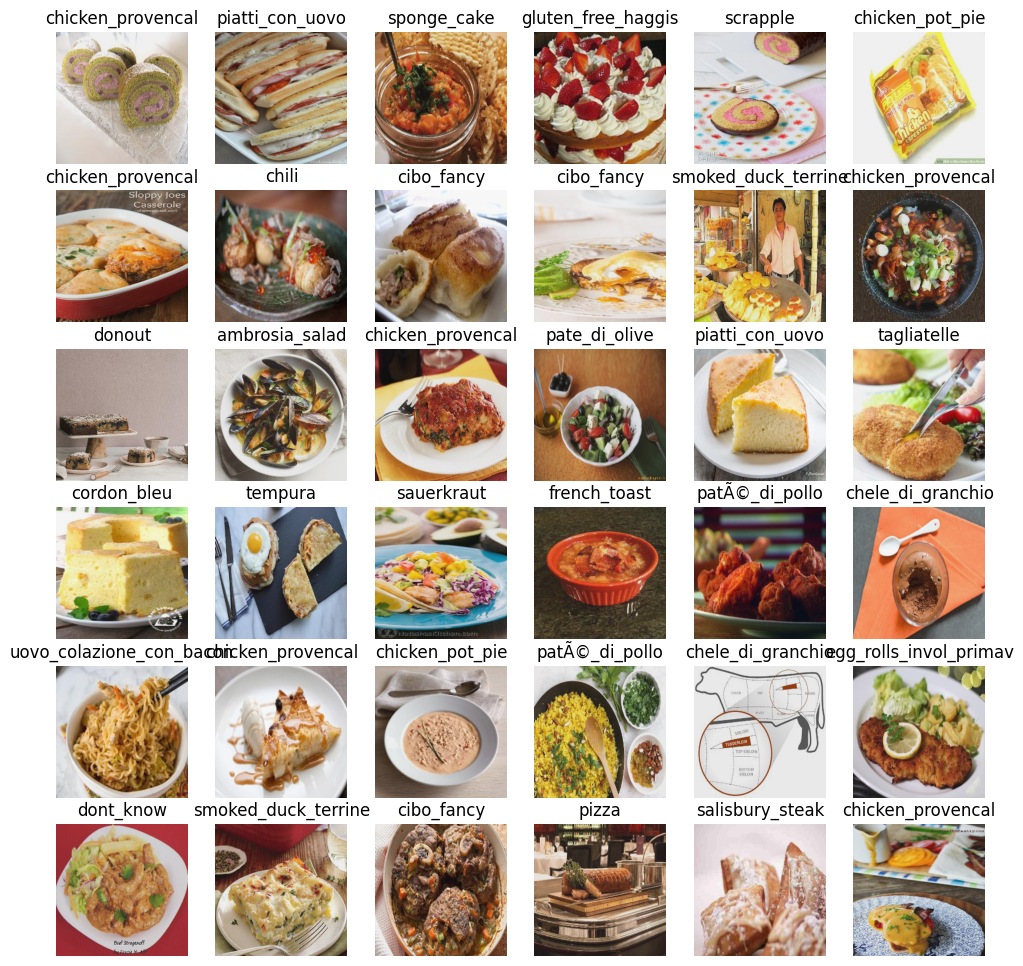

In [172]:
import matplotlib.pyplot as plt
import torch

figure, ax = plt.subplots(nrows=6, ncols=6, figsize=(12, 12))

for i, data in enumerate(unlabeled_classified):
    #assuming batch_size==1
    image = data[0]  
    label = data[1]
    image=np.squeeze(image)    
    image = image.permute(1, 2, 0)    
    image = (image - image.min()) / (image.max() - image.min()) # Normalize the tensor to the range [0, 1] 
    
    ax.ravel()[i].imshow(image)
    ax.ravel()[i].set_title(translate_label[label.item()])
    ax.ravel()[i].set_axis_off()
plt.tight_layout()
plt.show()
